# 07.1 无监督学习算法与K-Means快速聚类

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from ML_basic_function import *

### 1. Clustering algorithm and unsupervised learning

- K-Means

- Euclidean distance

$$
x_{cen} = \frac{x_1+x_2+...+x_n}{n}
$$

$$
y_{cen} = \frac{y_1+y_2+...+y_n}{n}
$$

(1) Determine the center point. The first round is randomly generated. In other cases, it is calculated through the center of mass;

(2) According to the center point, calculate the distance from each point to the center point;

(3) Divide the data set according to the distance calculation results.

- K-Means iteration stop condition

(1) The position of the center of mass does not change during two adjacent iterations;

(2) The category of each point does not change during two adjacent iterations;

within-group error
$$
\sum^K_{i=1}\sum_{x\in C_i}(c_i-x)^2
$$

$$
SSE = \sum^K_{i=1}\sum_{x\in C_i}(c_i-x)^2
$$

In [2]:
from sklearn.cluster import KMeans
KMeans?

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init='warn',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence. The algorithm
    implemented is "greedy k-means++". It differs from the vanilla k-means++
    by making several trials at each sampling step and choosing the best centroid
    among them.

    'random': cho

|Name|Description|      
|:--:|:--:|      
|n_clusters|聚类类别总数|      
|init|初始中心点创建方法|
|n_init|初始化几次中心点|
|max_iter|最大迭代次数|	
|tol|收敛条件|	
|precompute_distances|是否提前预计算距离|	
|algorithm|优化距离计算的方法选取|	

> [“k-means++: The advantages of careful seeding” ](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)

> Keep the model stable during subsequent iterations

In [3]:
np.random.seed(21)
X, y = arrayGenCla(num_examples = 20, num_inputs = 2, num_class = 2, deg_dispersion = [2, 0.5])

km = KMeans(n_clusters=2)
km.fit(X)

d:\CODE\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\CODE\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [4]:
km.cluster_centers_

array([[-0.96935007, -1.05271715],
       [ 1.03337769,  1.23489509]])

In [5]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

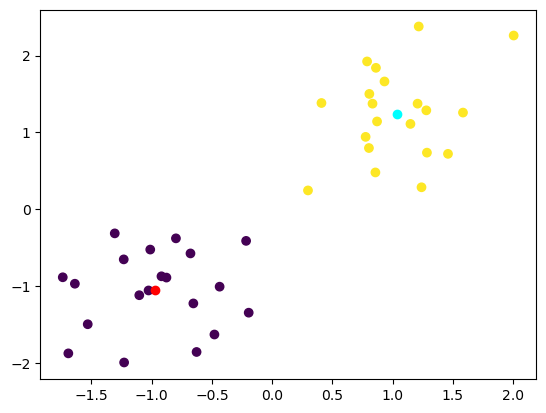

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)
plt.plot(km.cluster_centers_[0, 0], km.cluster_centers_[0, 1], 'o', c='red')
plt.plot(km.cluster_centers_[1, 0], km.cluster_centers_[1, 1], 'o', c='cyan')

In [7]:
km.inertia_

18.959608559900648

In [8]:
km.n_iter_

2

In [9]:
X_new = np.random.randn(2, 2)
X_new

array([[ 0.94589607, -0.75058415],
       [-0.79426004,  0.50839833]])

In [10]:
km.predict(X_new)

array([0, 0])

- silhouette coefficient

&emsp;&emsp;轮廓系数的计算过程如下：         
&emsp;&emsp;(1).对于第i条数据（以下简称i），计算该对象到所属簇的平均距离，记为$a_i$；        
&emsp;&emsp;(2).如果还存在其他簇（不包含第i个对象的簇，如A、B两个簇），分不同的簇，计算该对象到这些簇的所有点的平均距离（例如计算i到A簇中所有点的平均距离，以及计算i到B簇中所有点的平均距离），并在这些距离中找到最小值记为$b_i$；        
&emsp;&emsp;(3).则对于i，轮廓系数计算结果为：$s_i=\frac{b_i-a_i}{max(a_i, b_i)}$；        
&emsp;&emsp;(4).而对于聚类中的所有N条数据，最终轮廓系数为单个$s_i$的均值，即$s=mean(s_i)$

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
silhouette_score(X, km.labels_)

0.7035890353176562

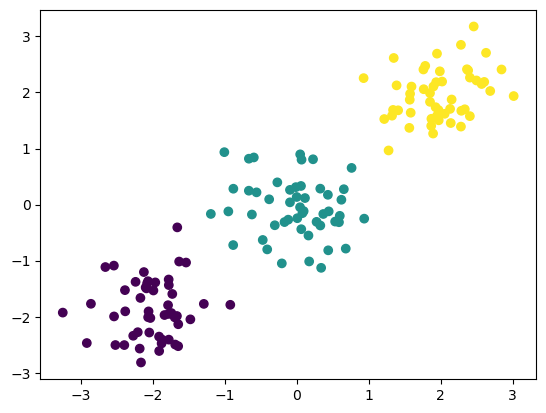

In [13]:
np.random.seed(23)
X, y = arrayGenCla(num_examples = 50, num_inputs = 2, num_class = 3, deg_dispersion = [2, 0.5])
plt.scatter(X[:, 0], X[:, 1], c=y)

In [14]:
ss = []

for i in range(2, 12):
    km = KMeans(n_clusters=i).fit(X)
    ss.append(silhouette_score(X, km.labels_))

ss

d:\CODE\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\CODE\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\CODE\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\CODE\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the

[0.5917969390803755,
 0.6753180189915984,
 0.5591989523669606,
 0.47736852110463057,
 0.37196744241513746,
 0.3673103673887976,
 0.3712542738892984,
 0.363515043009815,
 0.354678420203957,
 0.3729096676766345]